## Demo notebook for Cycle GANs

- The file will run cyclic GAN image to image translation on the input images stored in the ./test folder.
- The file will load the state dict of the generators from the checkpoints folder stored in the same directory as the ipython notebook
- Please download the checkpoints.zip file in the same directory from the following link before running the notebook.
https://drive.google.com/a/eng.ucsd.edu/file/d/1m8jVAZhMnU0i38Ltv11jUh-EYGiB-mPH/view?usp=sharing

In [1]:
## checkpoints directories
dir_vangogh = './checkpoints/vangogh2photo/latest.ckpt'
dir_monet = './checkpoints/monet2photo/latest.ckpt'
dir_cezanne = './checkpoints/cezanne2photo/latest.ckpt'
dir_ukiyoe = './checkpoints/ukiyoe2photo/latest.ckpt'

In [2]:
import os
import torch
from torch import nn
from torch.autograd import Variable
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import utils
from architecture import Generator, Discriminator
from matplotlib import pyplot as plt
from utils import create_link
import numpy as np

In [3]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1]) #TypeError: Invalid shape (3, 256, 1, 256) for image data
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    return h

In [4]:
transform = transforms.Compose(
        [transforms.Resize((256, 256)),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

demo_images = './test/' #demo images directory
b_test_data = dsets.ImageFolder(demo_images, transform=transform) 
b_test_loader = torch.utils.data.DataLoader(b_test_data, batch_size=8, num_workers=4) #load the input images and normalize them


## load state dict of the generators
Gab_vangogh = Generator(input_nc=3, output_nc=3, ngf=64, netG='resnet_9blocks', norm='instance', use_dropout= not False, gpu_ids=[0])
ckpt_vangogh = utils.load_checkpoint(dir_vangogh)
Gab_vangogh.load_state_dict(ckpt_vangogh['Gab'])
Gab_vangogh.eval();

Gab_monet = Generator(input_nc=3, output_nc=3, ngf=64, netG='resnet_9blocks', norm='instance', use_dropout= not False, gpu_ids=[0])
ckpt_monet = utils.load_checkpoint(dir_monet)
Gab_monet.load_state_dict(ckpt_monet['Gab'])
Gab_monet.eval();

Gab_cezanne = Generator(input_nc=3, output_nc=3, ngf=64, netG='resnet_9blocks', norm='instance', use_dropout= not False, gpu_ids=[0])
ckpt_cezanne = utils.load_checkpoint(dir_cezanne)
Gab_cezanne.load_state_dict(ckpt_cezanne['Gab'])
Gab_cezanne.eval();

Gab_ukiyoe = Generator(input_nc=3, output_nc=3, ngf=64, netG='resnet_9blocks', norm='instance', use_dropout= not False, gpu_ids=[0])
dir_ukiyoe = '/datasets/home/59/159/r2aggarw/cycleGAN-PyTorch/checkpoints/ukiyoe2photo/latest.ckpt'
ckpt_ukiyoe = utils.load_checkpoint(dir_ukiyoe)
Gab_ukiyoe.load_state_dict(ckpt_ukiyoe['Gab'])
Gab_ukiyoe.eval();



Network initialized with weights sampled from N(0,0.02).
 [*] Loading checkpoint from /datasets/home/59/159/r2aggarw/cycleGAN-PyTorch/checkpoints/vangogh2photo/latest.ckpt succeed!
Network initialized with weights sampled from N(0,0.02).
 [*] Loading checkpoint from /datasets/home/59/159/r2aggarw/cycleGAN-PyTorch/checkpoints/monet2photo/latest.ckpt succeed!
Network initialized with weights sampled from N(0,0.02).
 [*] Loading checkpoint from /datasets/home/59/159/r2aggarw/cycleGAN-PyTorch/checkpoints/cezanne2photo/latest.ckpt succeed!
Network initialized with weights sampled from N(0,0.02).
 [*] Loading checkpoint from /datasets/home/59/159/r2aggarw/cycleGAN-PyTorch/checkpoints/ukiyoe2photo/latest.ckpt succeed!


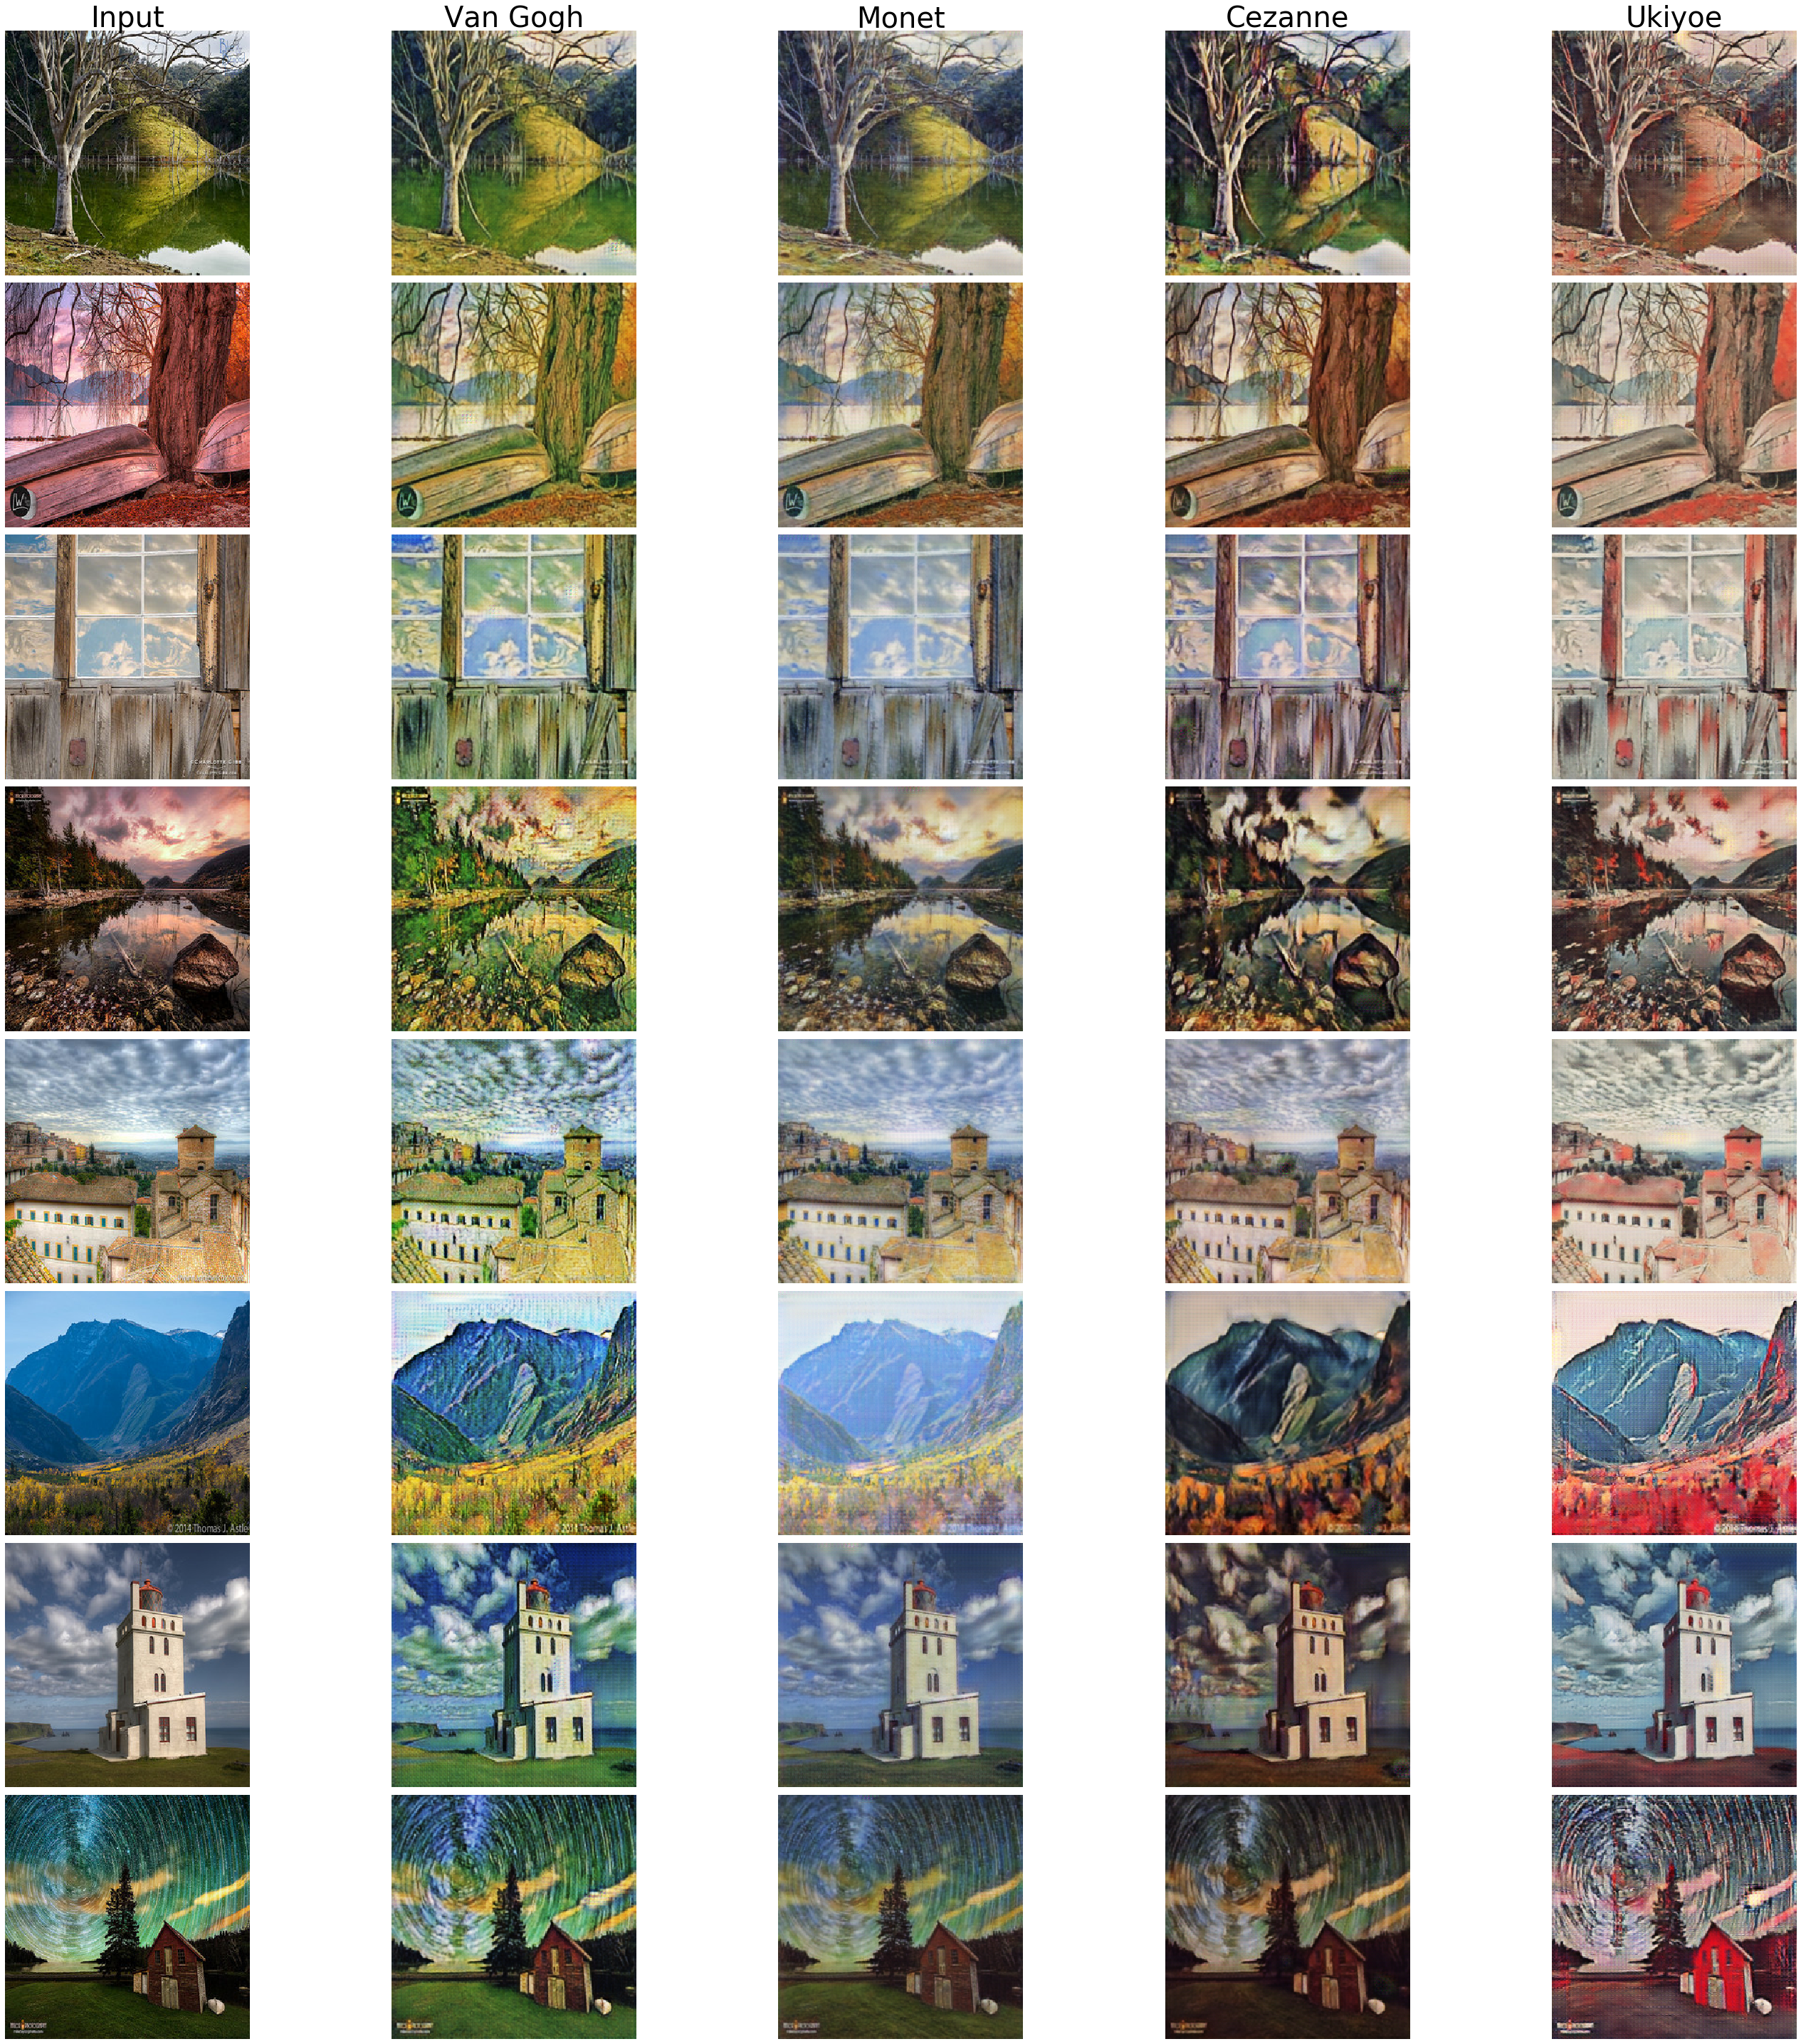

In [5]:
fig, axs = plt.subplots(ncols=5, nrows=8, sharex='all', sharey='all', figsize=(40, 40))
row, col = 0, 0
b_real_test = Variable(iter(b_test_loader).next()[0], requires_grad=True)
b_real_test = utils.cuda(b_real_test)

#image to image translation 
with torch.no_grad():
    a_fake_vangogh = Gab_vangogh(b_real_test)
    a_fake_monet  = Gab_monet(b_real_test)
    a_fake_cezanne  = Gab_cezanne(b_real_test)
    a_fake_ukiyoe  = Gab_ukiyoe(b_real_test)
    
#display the results
for t in range(0,8):
    
    b_real = b_real_test.detach()
    
    col=0
    myimshow(b_real[t], ax=axs[row][col] )
    axs[0][0].set_title("Input", fontsize=40)
    
    col+=1
    myimshow(a_fake_vangogh[t], ax=axs[row][col] )
    axs[0][1].set_title("Van Gogh", fontsize=40)
    
    col+=1
    myimshow(a_fake_monet[t], ax=axs[row][col] )
    axs[0][2].set_title("Monet", fontsize=40)
    
    col+=1
    myimshow(a_fake_cezanne[t], ax=axs[row][col] )
    axs[0][3].set_title("Cezanne", fontsize=40)
    
    col+=1
    myimshow(a_fake_ukiyoe[t], ax=axs[row][col] )
    axs[0][4].set_title("Ukiyoe", fontsize=40)
    row+=1
plt.tight_layout()